In [1]:
# Crafted by Collin Miller

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [28]:
import BachNet
import ChopinNet
import cv2
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from utils import display_utils
from utils import graph_utils
from utils import prediction_utils
from utils import preprocessing_utils

In [4]:
%matplotlib inline

In [5]:
bach = BachNet.BachNet()

In [19]:
receptive_field_shape = (23, 23)

In [115]:
particle = "data/particles/750_146"
gt_particle = "data/particles/750_146_gt"

In [116]:
img = cv2.imread(particle)
gt = cv2.imread(gt_particle)

In [117]:
plt.imsave("data/test/input/750_146", img, cmap='gray')

In [118]:
plt.imsave("data/test/input/750_146_gt", gt, cmap='gray')

In [119]:
img, gt, seeds = preprocessing_utils.load_image("data/test/chopin/750_146", "test", "data/test/input/750_146", "data/test/input/750_146_gt")

data/test/input/750_146_gt data/test/chopin/750_146


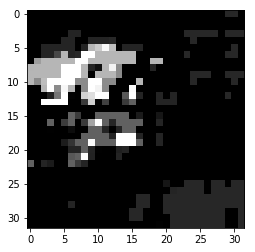

In [120]:
bach.build(23, 23, 1)
# 'models/saved_model/Bach/model.h5'
bach.load_model()

bps = prediction_utils.boundary_probabilities(bach, img)

plt.imshow(bps, cmap='gray')

In [121]:
chopin = ChopinNet.Chopin()
chopin.build(receptive_field_shape)
chopin.initialize_session()
chopin.load_model("models/saved_model/Chopin/model.ckpt")

INFO:tensorflow:Restoring parameters from models/saved_model/Chopin/model.ckpt


In [122]:
I_a = np.stack((img, bps), axis=2)
I_a = preprocessing_utils.pad_for_window(I_a,
                           chopin.receptive_field_shape[0],
                           chopin.receptive_field_shape[1])

graph = graph_utils.prims_initialize(img)

msf = prediction_utils.minimum_spanning_forest(chopin, I_a, graph, seeds)

segmentations = display_utils.assignments(img, msf, seeds)

assignments = nx.get_node_attributes(msf, 'seed')

Starting gradient segmentation...
Segmentation done: 7.729353s


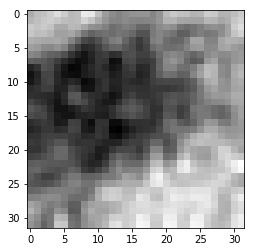

In [123]:
plt.imshow(img, cmap='gray')

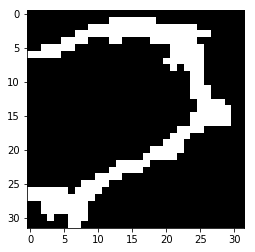

In [124]:
plt.imshow(gt, cmap='gray')

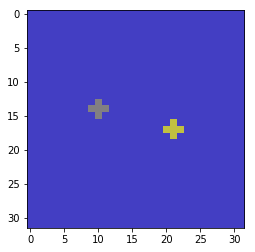

In [125]:
plt.imshow(segmentations)

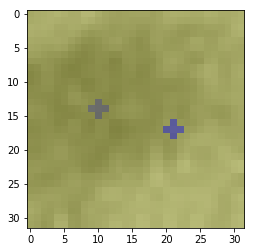

In [126]:
plt.imshow(display_utils.transparent_mask(img, segmentations))

In [127]:
cuts = graph_utils.get_cut_edges(msf)

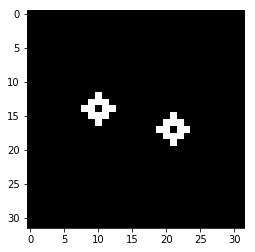

In [128]:
plt.imshow(display_utils.view_boundaries(np.zeros_like(img), cuts))